In [5]:
!pip install pandas


In [6]:
!python -m pip install --upgrade pip setuptools wheel




In [7]:
import pandas as pd
import numpy as np

import datetime 
import time

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [8]:
events_df = pd.read_csv(r"C:\Users\admin\Desktop\Stock price project\AI-Based product Recommendation system for E-commerce\events.csv")
category_tree_df = pd.read_csv(r"C:\Users\admin\Desktop\Stock price project\AI-Based product Recommendation system for E-commerce\category_tree.csv")
item_properties_1_df = pd.read_csv(r"C:\Users\admin\Desktop\Stock price project\AI-Based product Recommendation system for E-commerce\item_properties_part1.csv")
item_properties_2_df = pd.read_csv(r"C:\Users\admin\Desktop\Stock price project\AI-Based product Recommendation system for E-commerce\item_properties_part2.csv")

In [9]:
events_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [10]:
events_df[events_df.transactionid.notnull()].event.unique() 

array(['transaction'], dtype=object)

In [11]:
#Which event has null value 
events_df[events_df.transactionid.isnull()].event.unique() 

array(['view', 'addtocart'], dtype=object)

In [12]:
print(events_df.columns) 

Index(['timestamp', 'visitorid', 'event', 'itemid', 'transactionid'], dtype='object')


# Now let's take a look at the Item Properties

In [13]:
item_properties_1_df.head()


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


# Category ID 

In [14]:
category_tree_df.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [15]:
item_properties_1_df.loc[(item_properties_1_df.property == 'categoryid') & (item_properties_1_df.value == '1016')].sort_values('timestamp').head()

,timestamp,itemid,property,value
6363096,1431226800000,339403,categoryid,1016
8597591,1431226800000,161686,categoryid,1016
7942027,1431226800000,418837,categoryid,1016
10230975,1431226800000,85538,categoryid,1016
7280176,1431226800000,278463,categoryid,1016


# Customer Behaviour Exploration

In [16]:
#Let's get all the customers who bought something
customer_purchased = events_df[events_df.transactionid.notnull()].visitorid.unique()
customer_purchased.size

11719

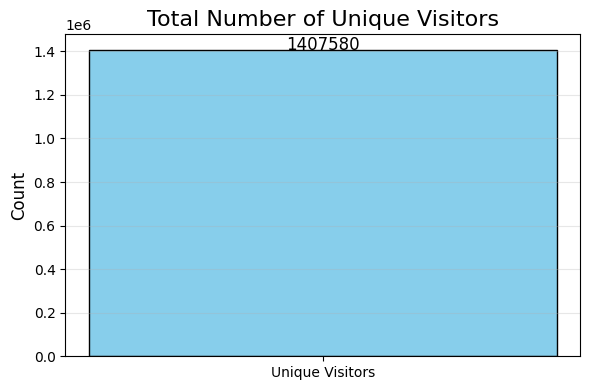

In [17]:
import matplotlib.pyplot as plt

# Get all unique visitor IDs
all_customers = events_df['visitorid'].unique()
unique_visitor_count = all_customers.size

# Data for the bar chart
data = {'Unique Visitors': unique_visitor_count}

# Create the bar chart
plt.figure(figsize=(6, 4))
plt.bar(data.keys(), data.values(), color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Total Number of Unique Visitors', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Display the count on top of the bar
for index, value in enumerate(data.values()):
    plt.text(index, value + 5, str(value), ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


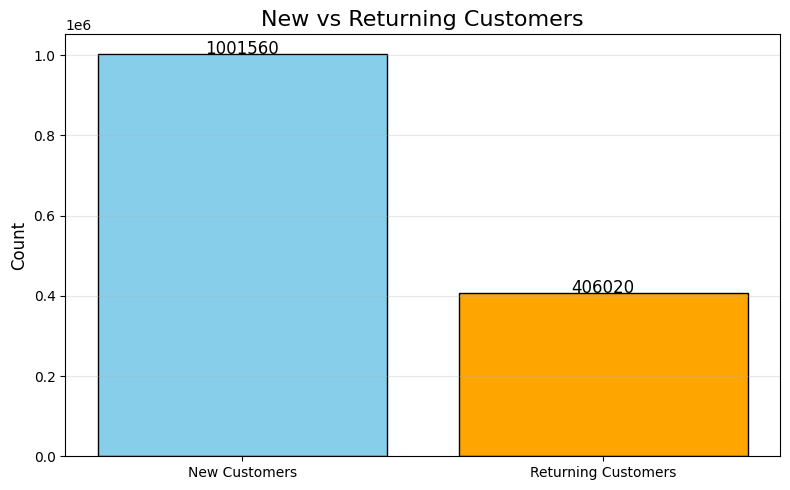

Total Customers: 1407580
New Customers: 1001560
Returning Customers: 406020


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming `events_df` is already loaded and has a 'visitorid' column.

# Count the number of events per visitor
visitor_event_counts = events_df['visitorid'].value_counts()

# Identify returning customers (those with more than one event)
returning_customers = visitor_event_counts[visitor_event_counts > 1]
returning_count = len(returning_customers)

# Calculate total customers and unique visitors
total_customers = len(events_df['visitorid'].unique())
new_customers_count = total_customers - returning_count

# Data for the bar chart
data = {'New Customers': new_customers_count, 'Returning Customers': returning_count} 

# Create the bar chart
plt.figure(figsize=(8, 5)) 
plt.bar(data.keys(), data.values(), color=['skyblue', 'orange'], edgecolor='black')

# Add labels and title
plt.title('New vs Returning Customers', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add counts above bars
for index, value in enumerate(data.values()):
    plt.text(index, value + 5, str(value), ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Print the counts
print(f"Total Customers: {total_customers}")
print(f"New Customers: {new_customers_count}")
print(f"Returning Customers: {returning_count}")


# Recommended Products from Top selling 

These products can be presented to new customers under categories like:
"[Top Picks for You]" "[Trending Now]" "[Customer Favorites]" 

Top 10 Products Recommended for Returning Customers:
itemid
461686    2425
257040    1454
309778    1347
219512    1332
384302    1245
320130    1208
9877      1099
111530    1026
7943      1023
234255    1000
Name: count, dtype: int64


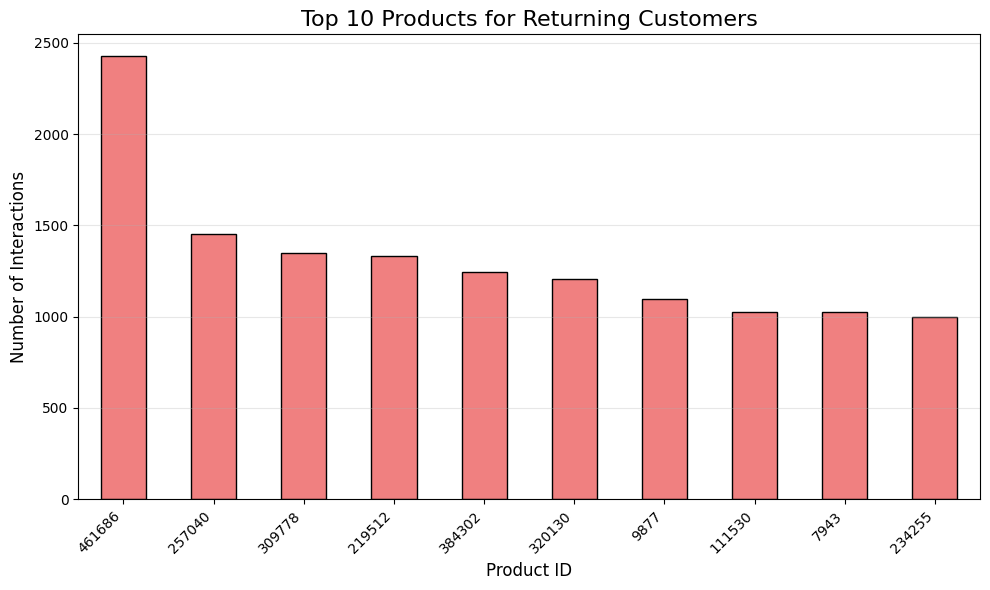

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


visitor_event_counts = events_df['visitorid'].value_counts()
returning_customers = visitor_event_counts[visitor_event_counts > 1].index


returning_customer_events = events_df[events_df['visitorid'].isin(returning_customers)]


popular_products = (
    returning_customer_events['itemid']  
    .value_counts()
    .sort_values(ascending=False)
    .head(10)  
)

# Step 4: Display recommendations
print("Top 10 Products Recommended for Returning Customers:")
print(popular_products)

plt.figure(figsize=(10, 6))
popular_products.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 Products for Returning Customers', fontsize=16)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Number of Interactions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [20]:
buying_visitors = events_df[events_df.event == 'transaction'].visitorid.sort_values().unique()
buying_visitors.size

11719

##### Out of 1,407,580 visitors, ony 11,719 bought something so around 1,395,861 visitors just viewed items

In [21]:
all_visitors = events_df.visitorid.sort_values().unique()
all_visitors.size

1407580

In [22]:
viewing_visitors_list = list(set(all_visitors) - set(buying_visitors))

In [23]:
def create_dataframe(visitor_list):
    
    array_for_df = []
    for index in visitor_list:

        #Create that visitor's dataframe once
        v_df = events_df[events_df.visitorid == index]

        temp = []
        #Add the visitor id
        temp.append(index)

        #Add the total number of unique products viewed
        temp.append(v_df[v_df.event == 'view'].itemid.unique().size)

        #Add the total number of views regardless of product type
        temp.append(v_df[v_df.event == 'view'].event.count())

        #Add the total number of purchases
        number_of_items_bought = v_df[v_df.event == 'transaction'].event.count()
        temp.append(number_of_items_bought)

        #Then put either a zero or one if they made a purchase
        if(number_of_items_bought == 0):
            temp.append(0)
        else:
            temp.append(1)

        array_for_df.append(temp)
    
    return pd.DataFrame(array_for_df, columns=['visitorid', 'num_items_viewed', 'view_count', 'bought_count', 'purchased'])

In [24]:
buying_visitors_df = create_dataframe(buying_visitors)

In [25]:
buying_visitors_df.shape

(11719, 5)

In [26]:
import random
random.shuffle(viewing_visitors_list)

In [27]:
viewing_visitors_df = create_dataframe(viewing_visitors_list[0:27820])

In [28]:
viewing_visitors_df.shape

(27820, 5)

In [29]:
main_df = pd.concat([buying_visitors_df, viewing_visitors_df], ignore_index=True)

In [30]:
main_df = main_df.sample(frac=1)

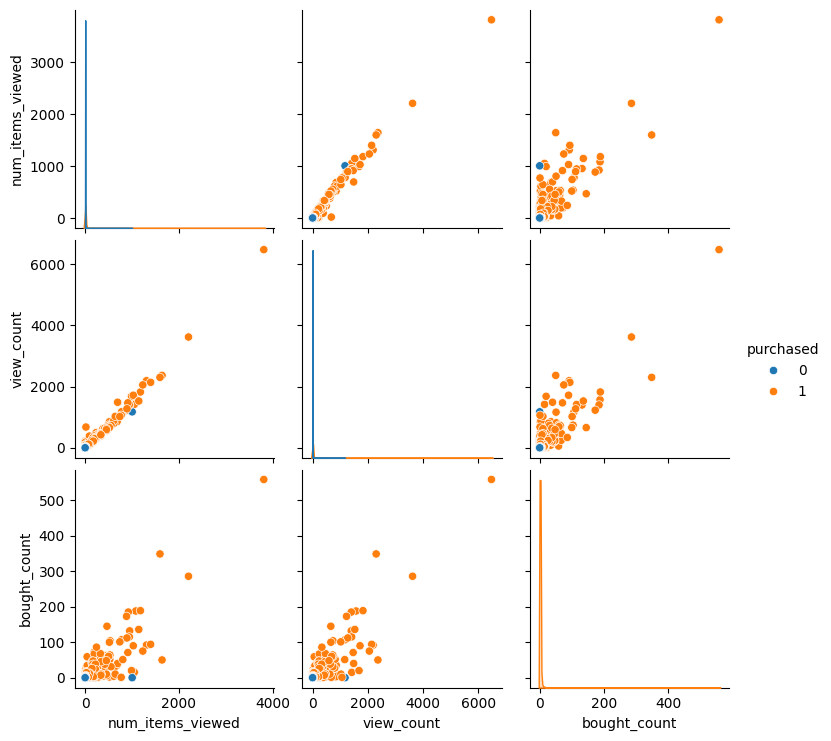

In [31]:
sns.pairplot(main_df, x_vars = ['num_items_viewed', 'view_count', 'bought_count'],
             y_vars = ['num_items_viewed', 'view_count', 'bought_count'],  hue = 'purchased')

In [34]:
X = main_df.drop(['purchased', 'visitorid', 'bought_count'], axis = 'columns')
y = main_df.purchased

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.7)

In [32]:
logreg = LogisticRegression()

In [36]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred_class = logreg.predict(X_test)

In [38]:
print('accuracy = {:7.4f}'.format(metrics.accuracy_score(y_test, y_pred_class)))

accuracy =  0.7984


## So our model's accuracy in predicting buying visitors is around 80% 

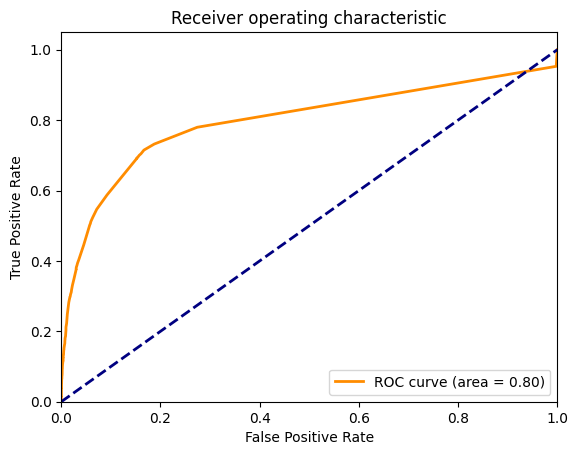

In [39]:
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show() 

###### The graph above shows the accuracy of our binary classifier (Logistic Regression). 
###### Just means that the closer the orange curve leans to the top left hand part of the graph,the better the accuracy.